In [ ]:
import pandas as pd
df = pd.read_csv("auction_results.csv")
df["auction_date"] = df["auction_date"].str[:10]

# EDA

In [37]:
(df['winning_price']/10000).describe()

count    30855.000000
mean      1348.575778
std       1276.204762
min         27.500000
25%        545.000000
50%       1010.000000
75%       1800.000000
max      90001.000000
Name: winning_price, dtype: float64

In [38]:
df.head()

,brand,model,year,transmission,fuel,displacement_cc,mileage_km,color,winning_price,auction_date,auction_house
0,아우디,A8,2011,자동,휘발유,4163.0,211048.0,회색,4533000.0,2025-03-27,오토마트
1,기아,쏘울,2010,자동,휘발유,1591.0,211718.0,흰색,2119000.0,2025-03-27,오토마트
2,현대,그랜저,2011,자동,휘발유,2359.0,281870.0,흰색,3230000.0,2025-03-27,오토마트
3,BMW,5시리즈,2011,자동,휘발유,2996.0,338928.0,기타,4871000.0,2025-03-27,오토마트
4,현대,벨로스터,2014,자동,휘발유,1591.0,93165.0,빨강(주홍),3720000.0,2025-03-27,오토마트


## 결측치 처리

In [31]:
df['auction_date'].str.len().unique()

array([10])

자동차 경매 데이터 EDA 분석을 시작합니다...
=== 데이터 기본 정보 ===
데이터 크기: (30855, 15)

컬럼별 결측치:
brand              0
model              0
year               0
transmission       0
fuel               0
displacement_cc    0
mileage_km         0
color              0
winning_price      0
auction_date       0
auction_house      0
auction_year       0
auction_month      0
car_age            0
annual_mileage     9
dtype: int64

기본 통계:
               year  displacement_cc    mileage_km  winning_price  \
count  30855.000000     30855.000000  3.085500e+04   3.085500e+04   
mean    2017.628747      1960.048963  3.882836e+05   1.348576e+07   
min       11.000000         0.000000  0.000000e+00   2.750000e+05   
25%     2015.000000      1591.000000  8.444200e+04   5.450000e+06   
50%     2019.000000      1999.000000  1.748390e+05   1.010000e+07   
75%     2021.000000      2497.000000  2.688850e+05   1.800000e+07   
max     2026.000000    109645.000000  1.111111e+09   9.000100e+08   
std       20.181554      1089.109052

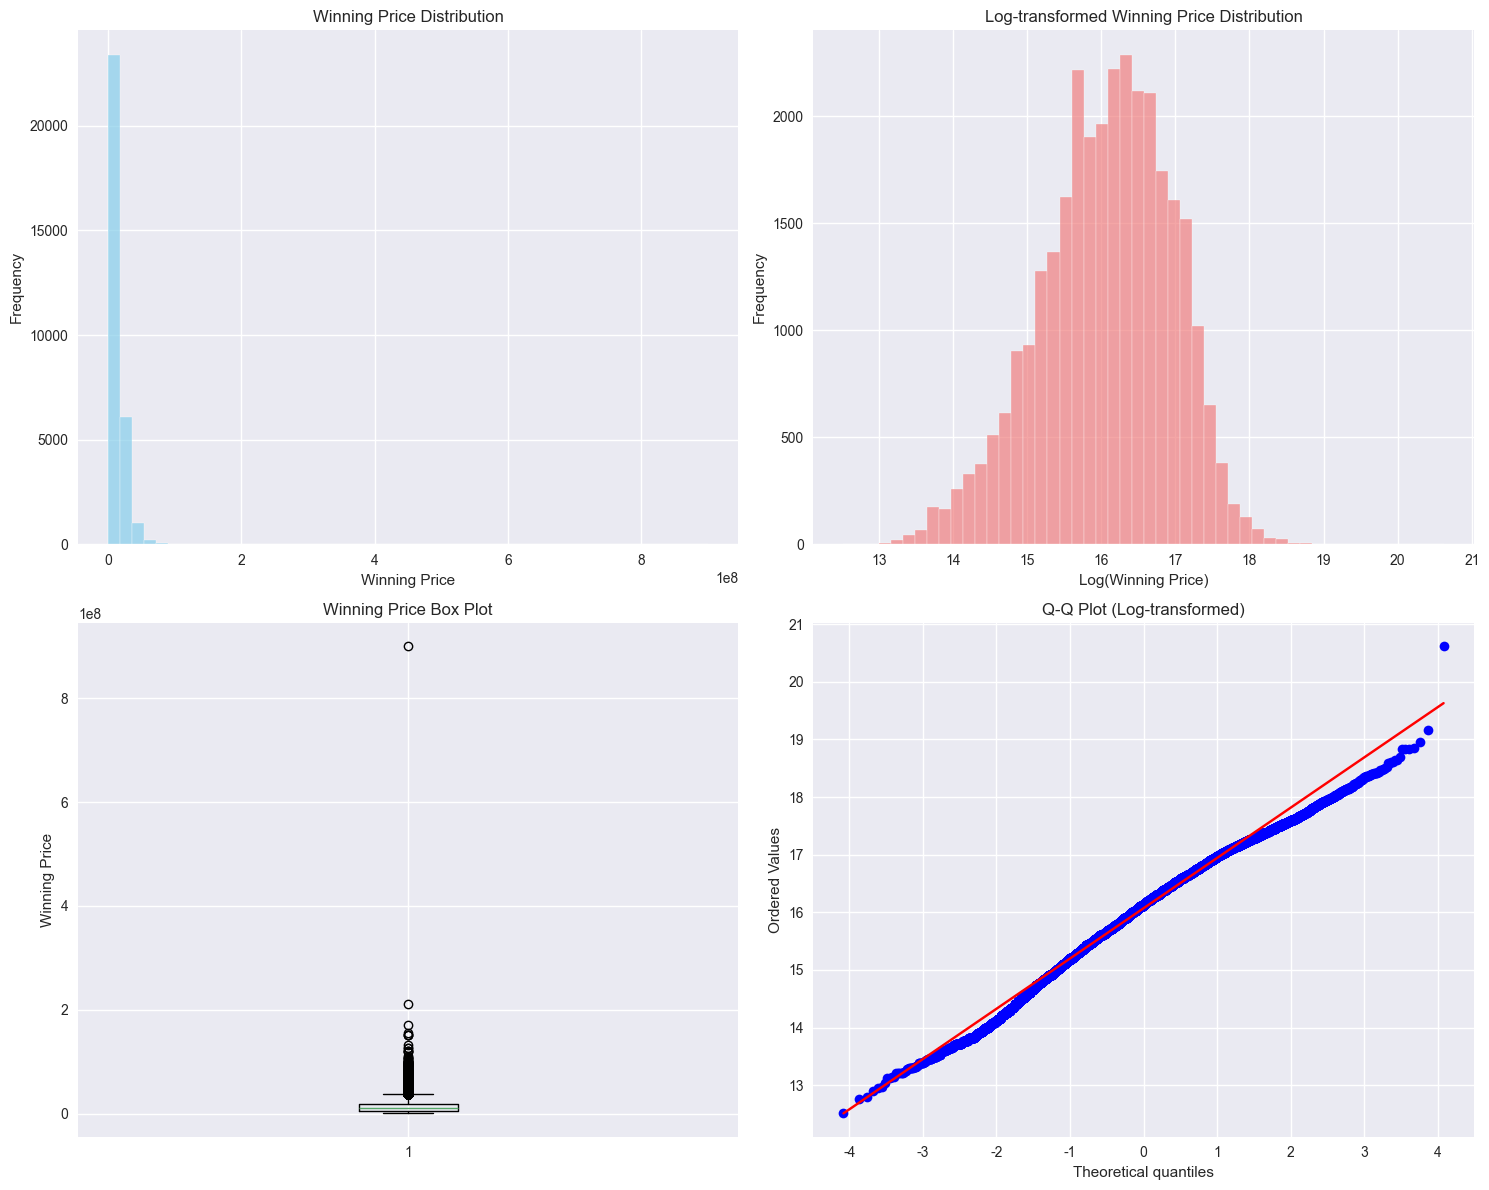

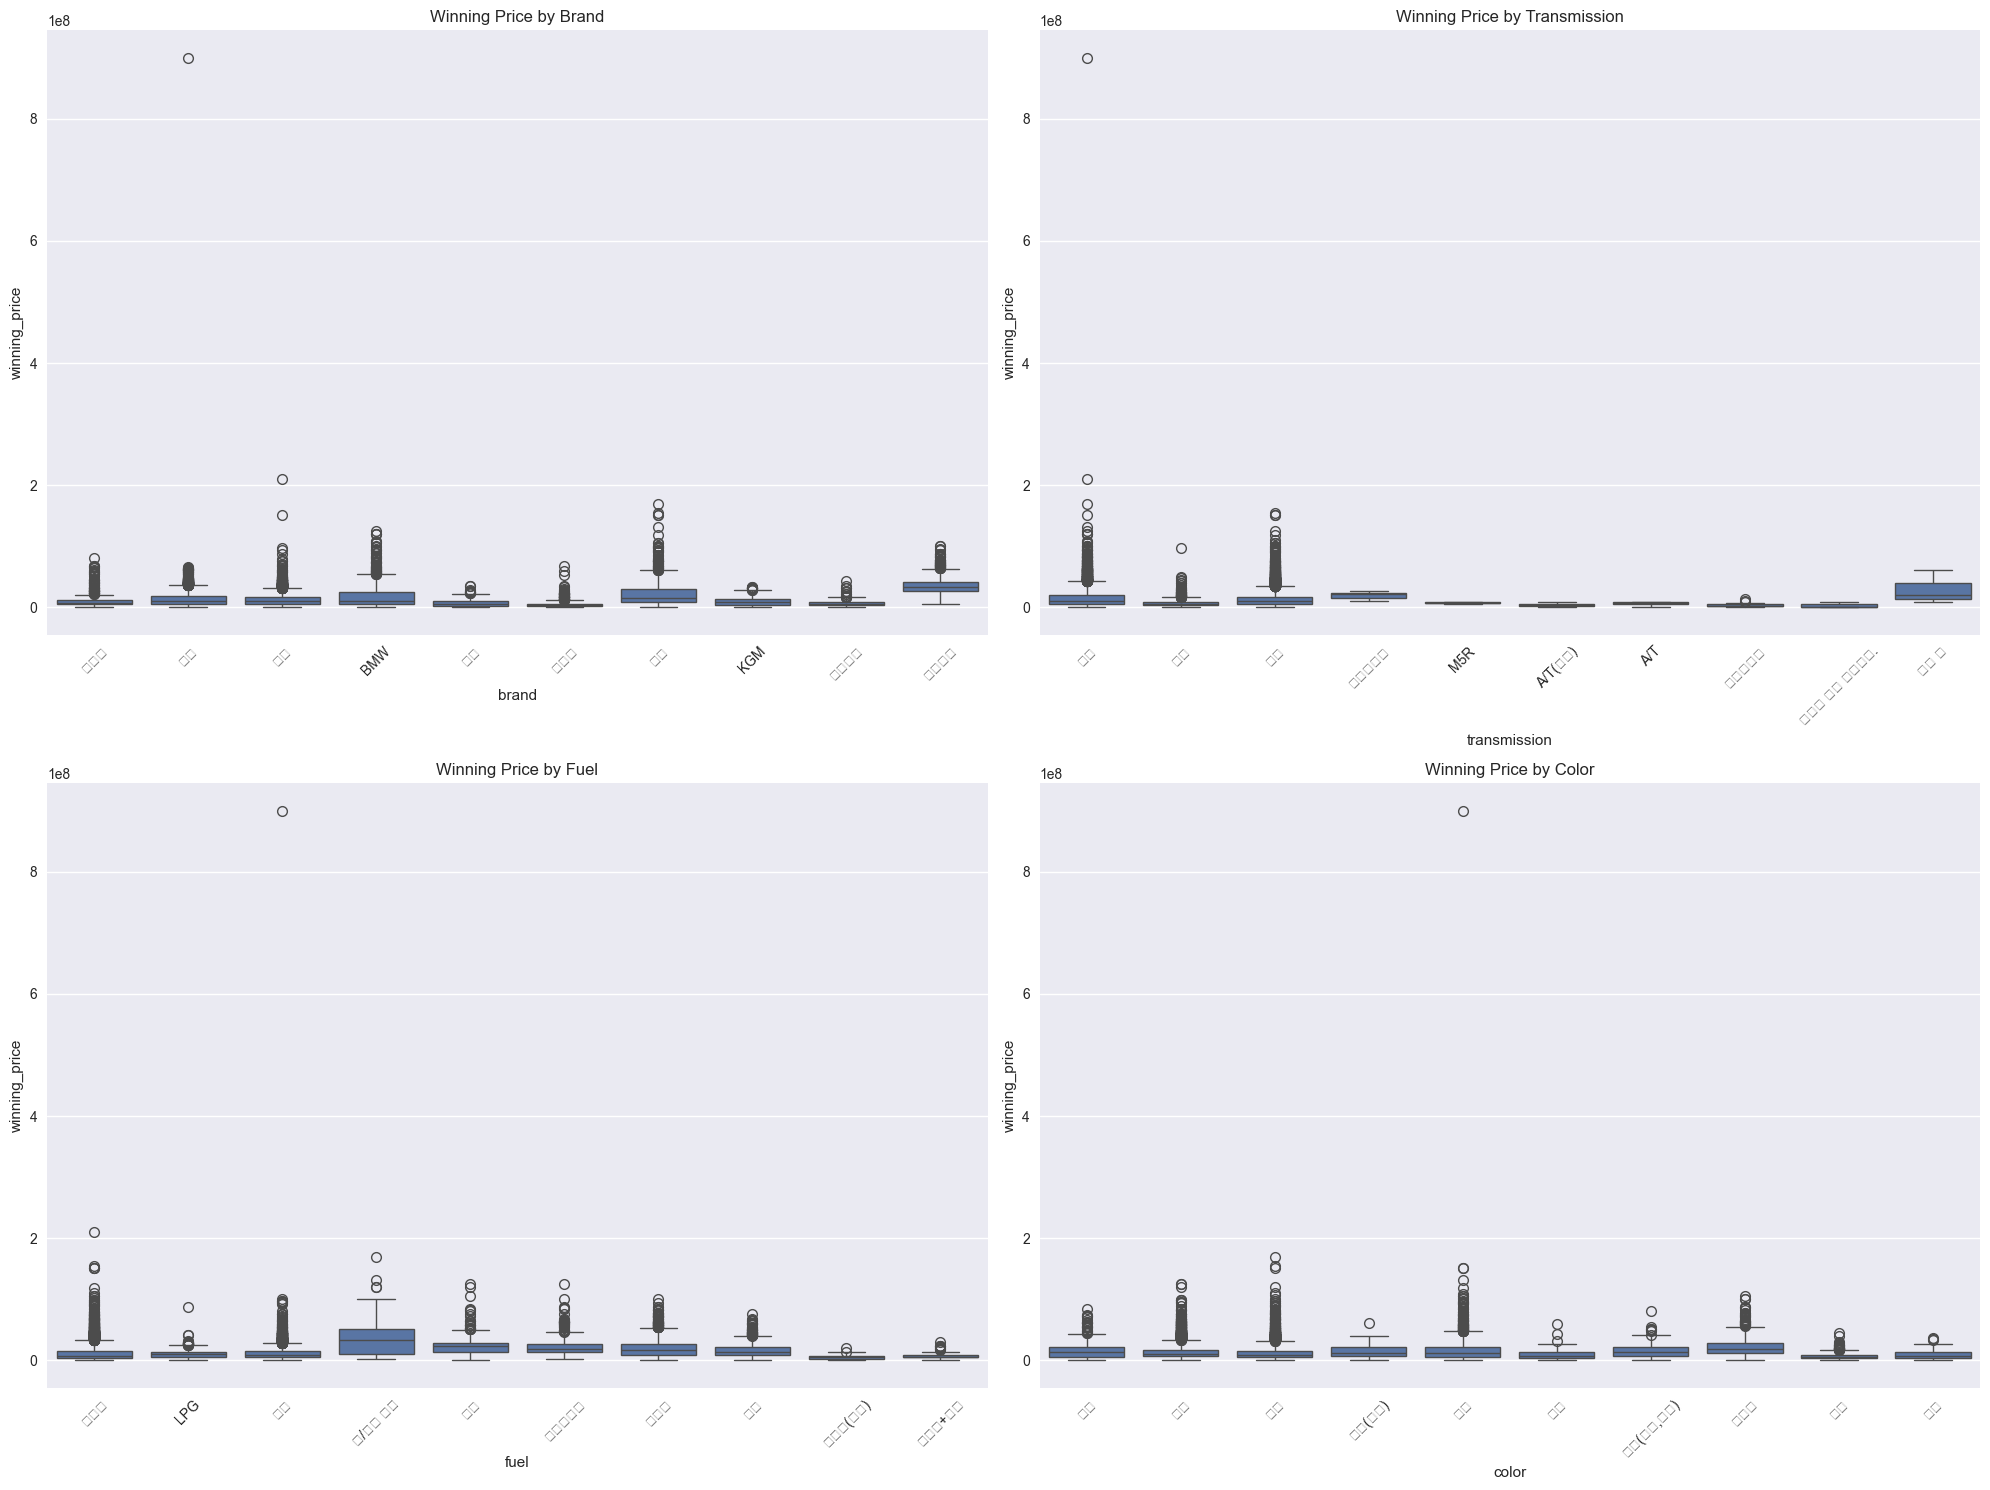

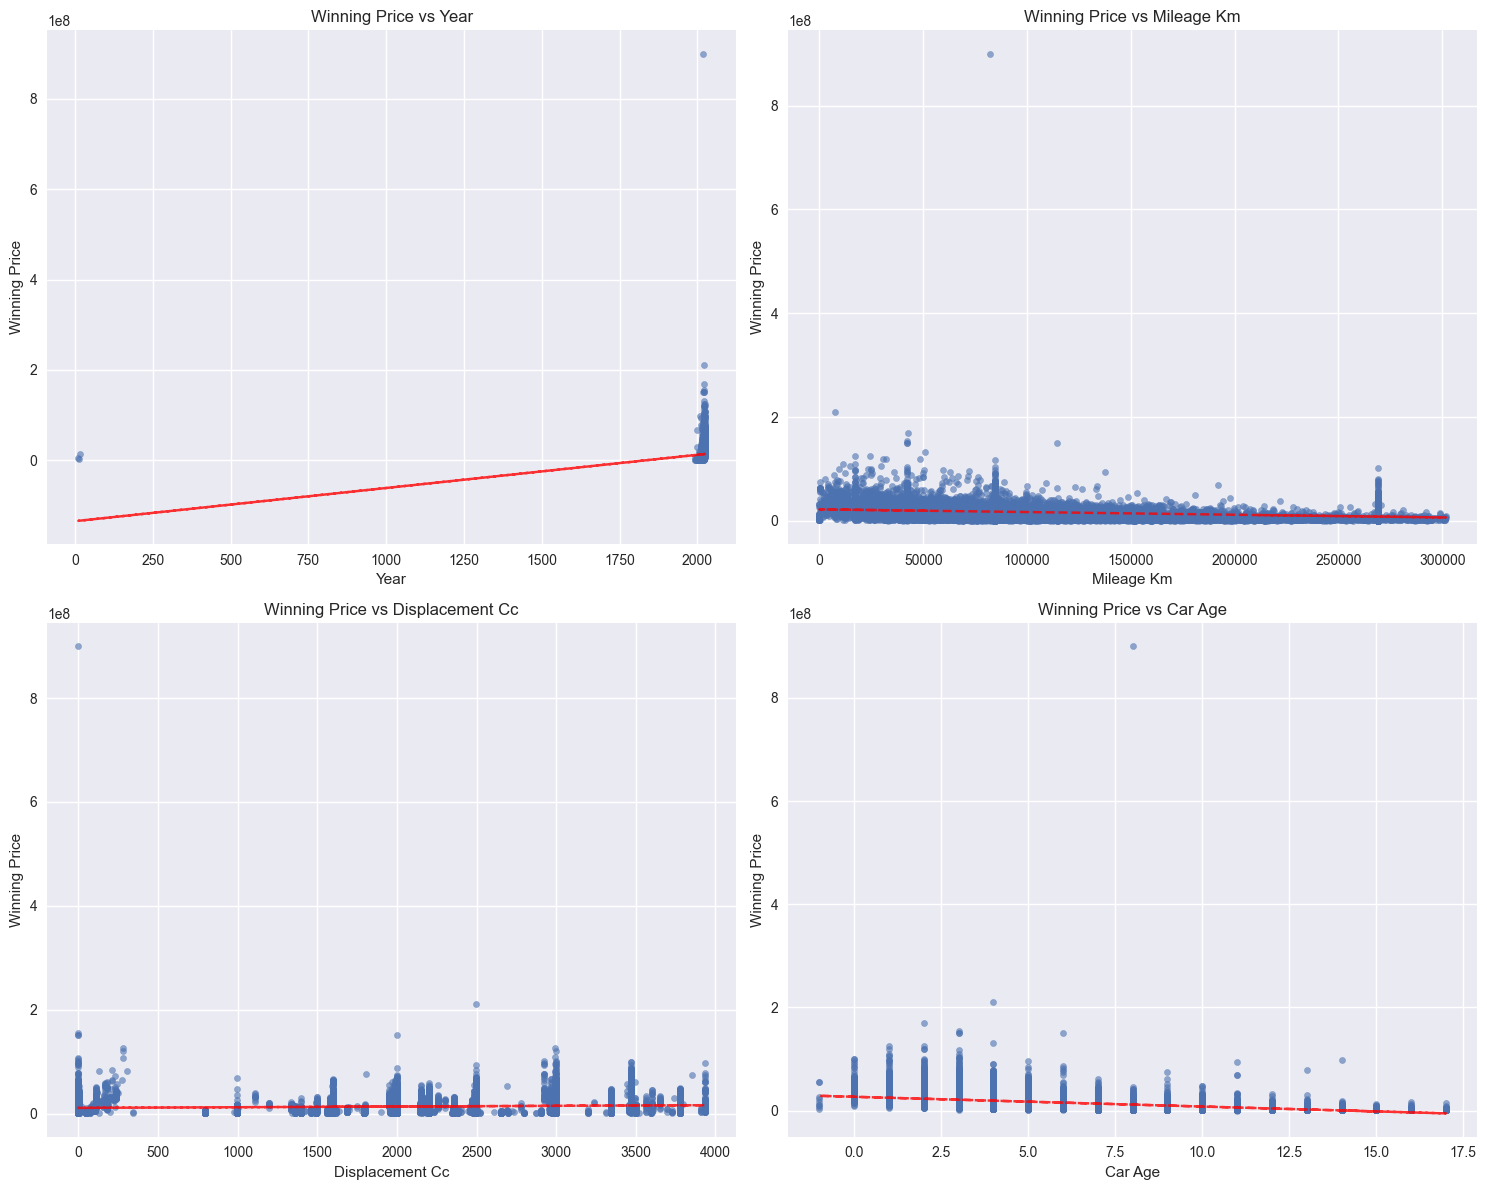

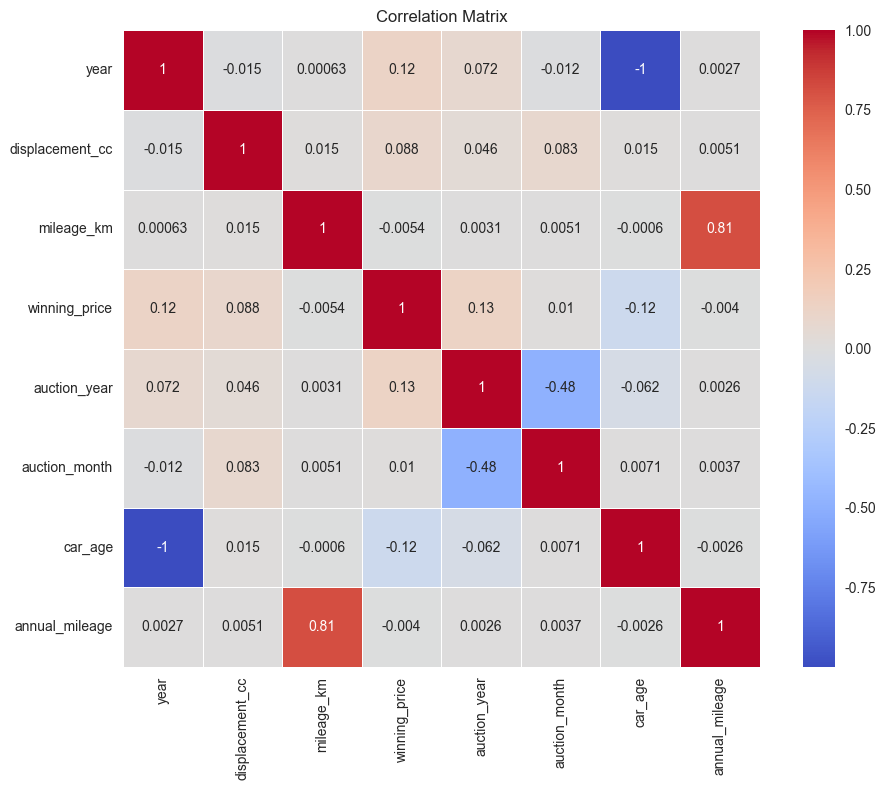

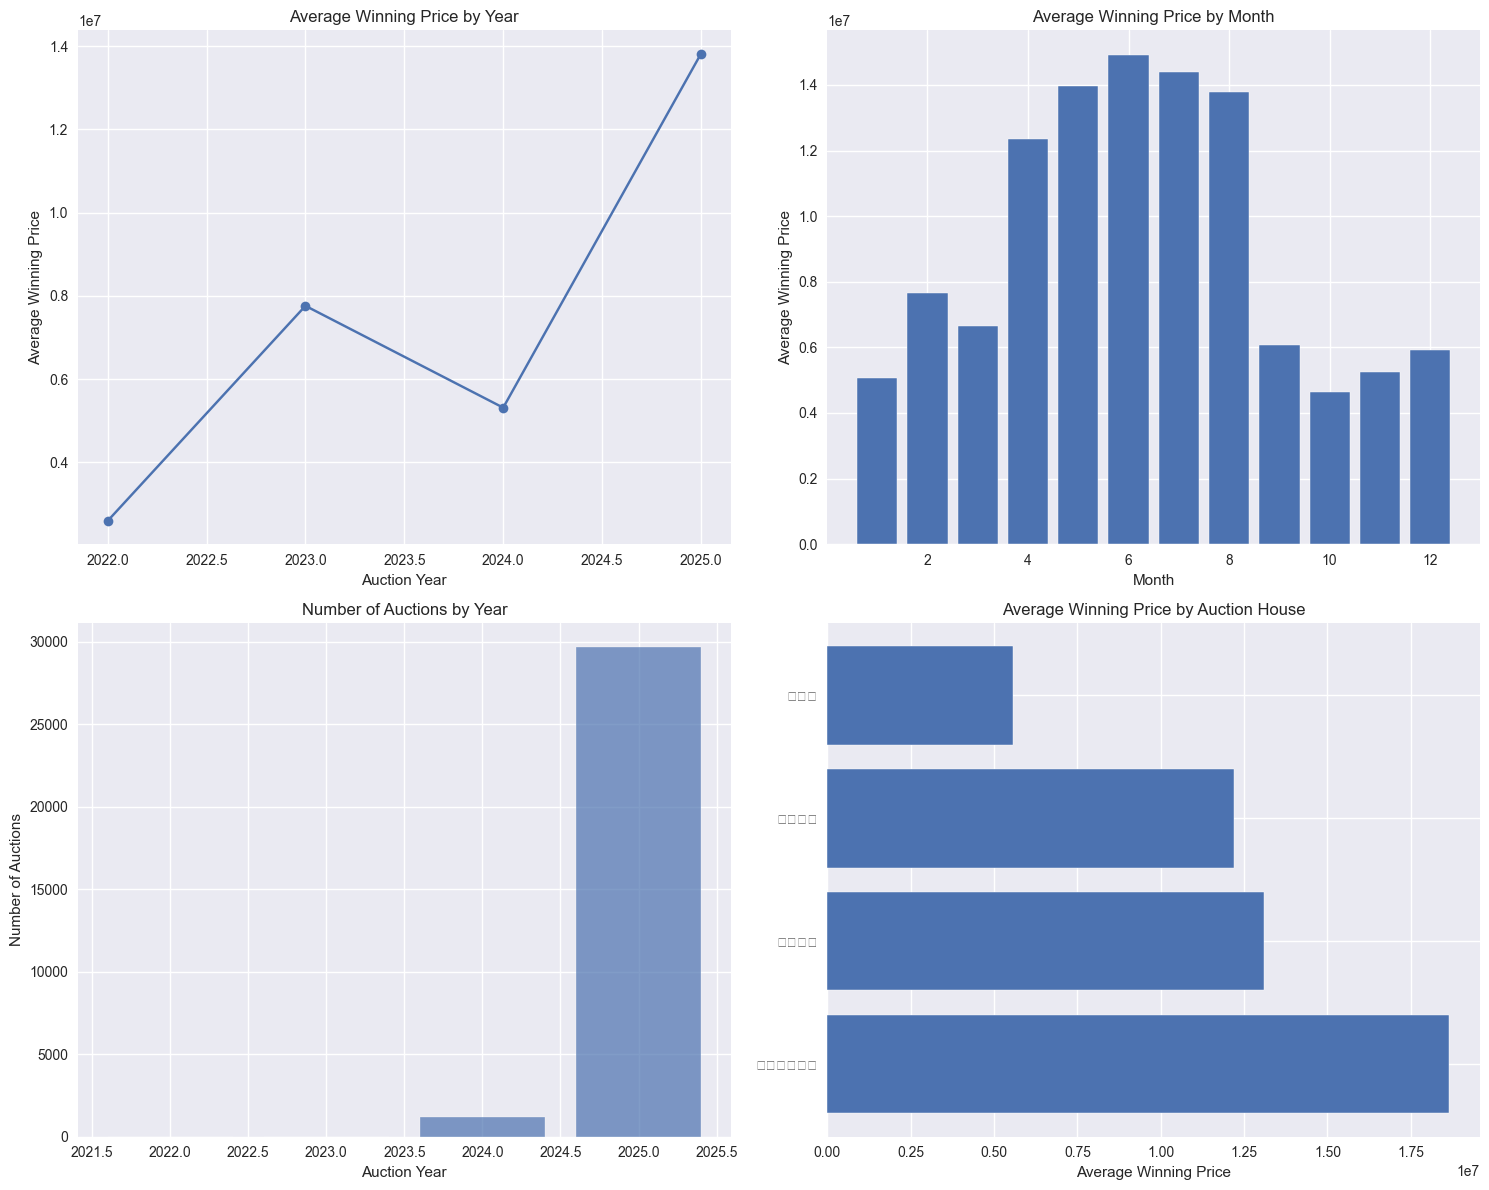

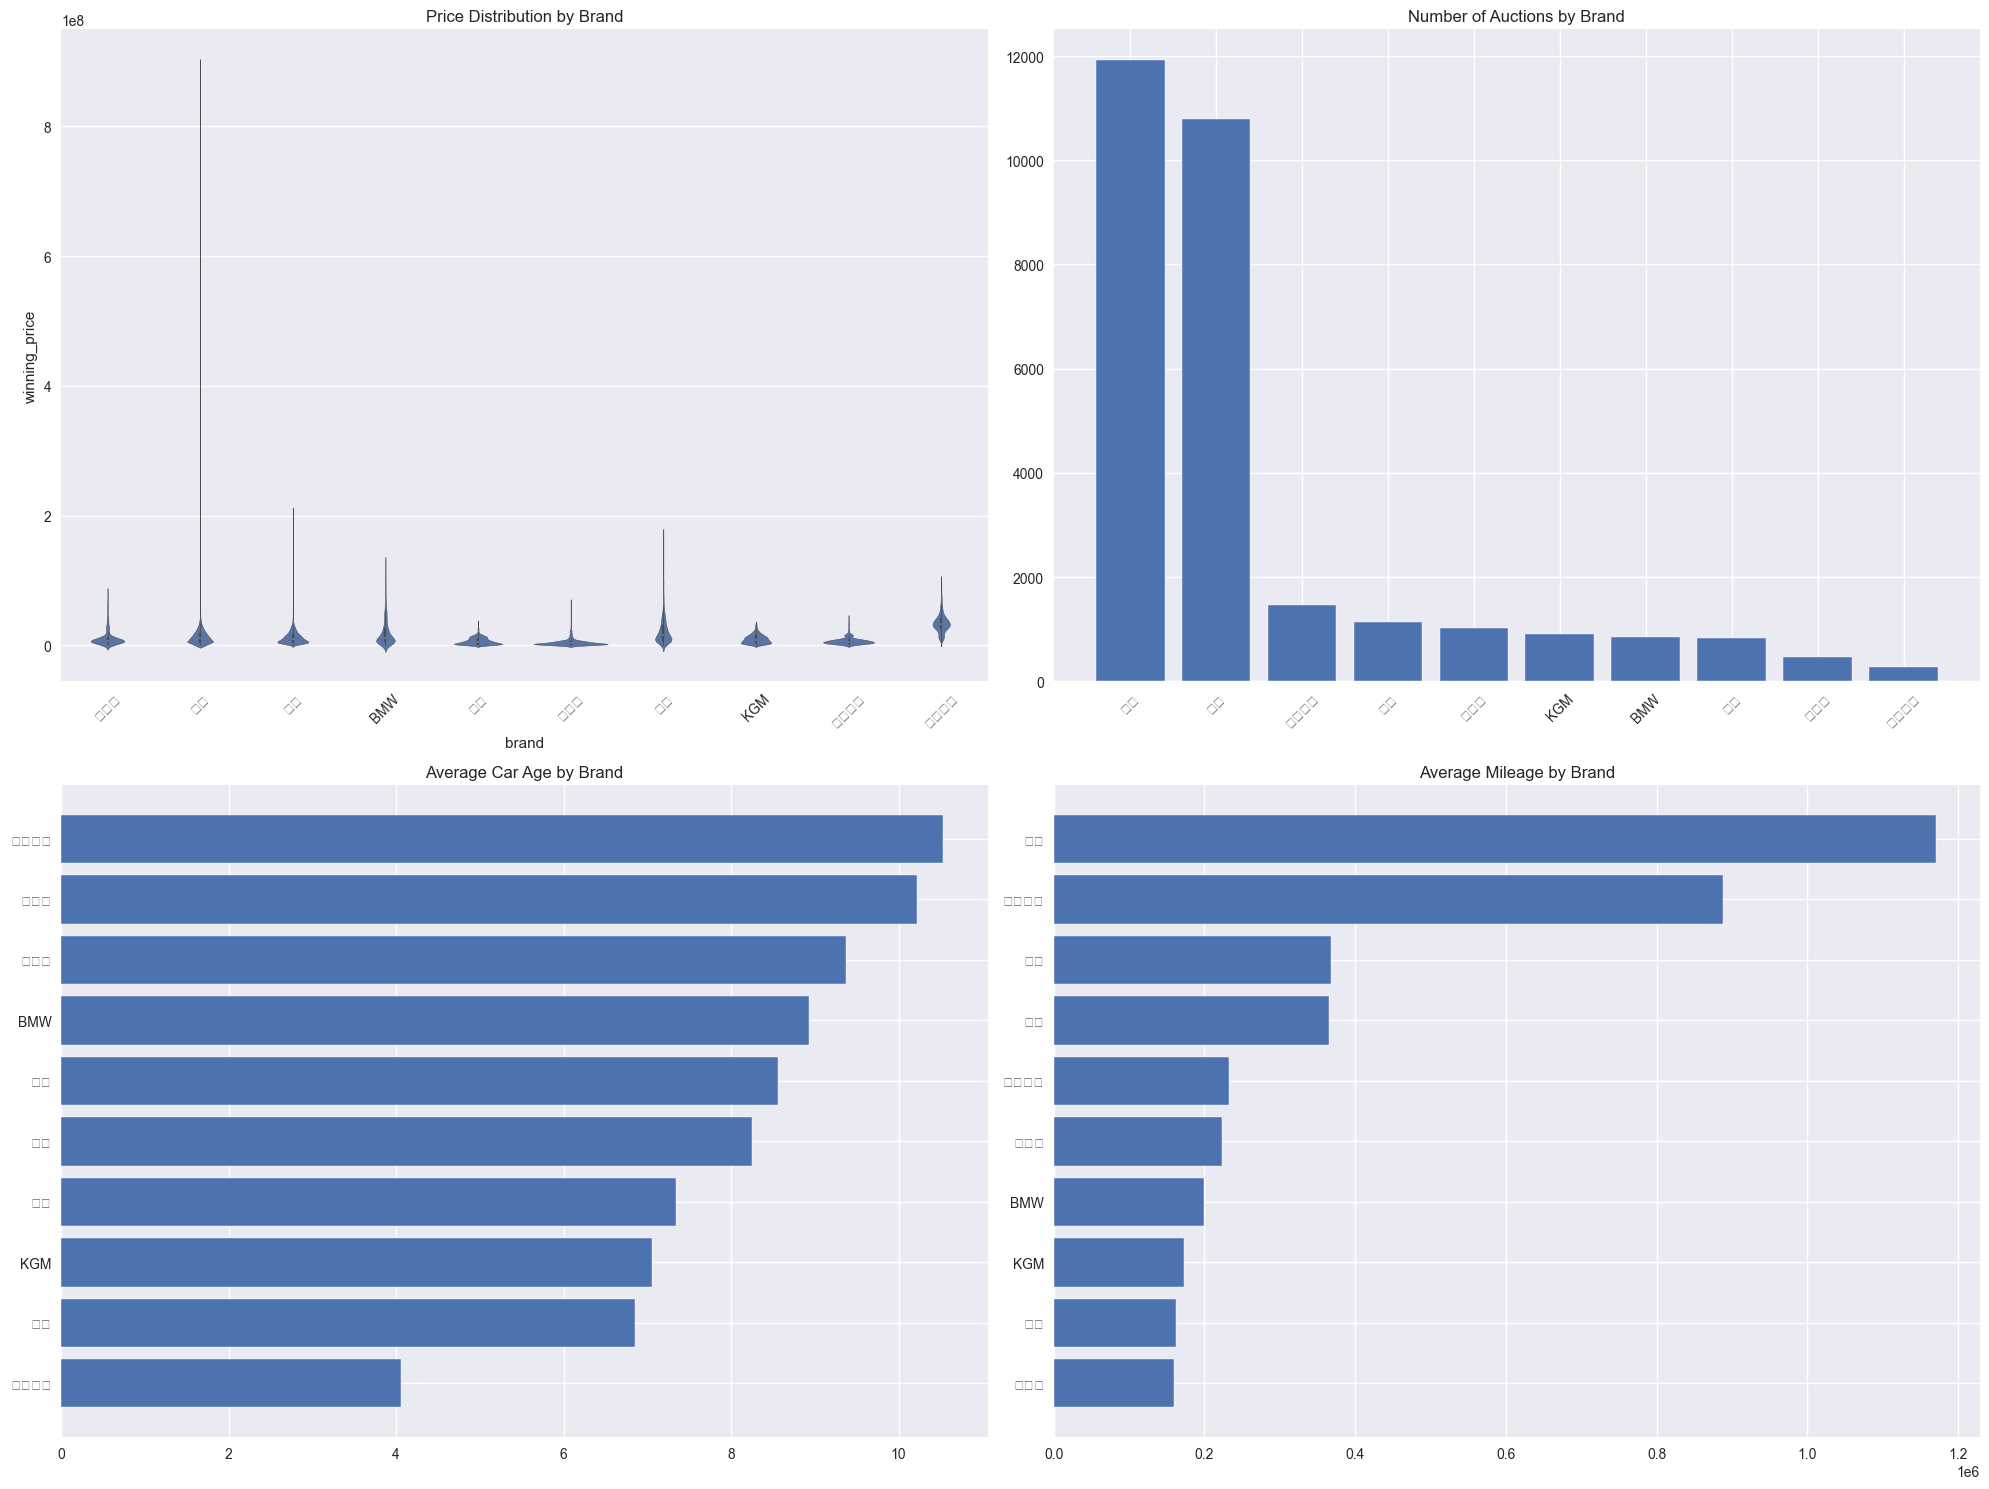

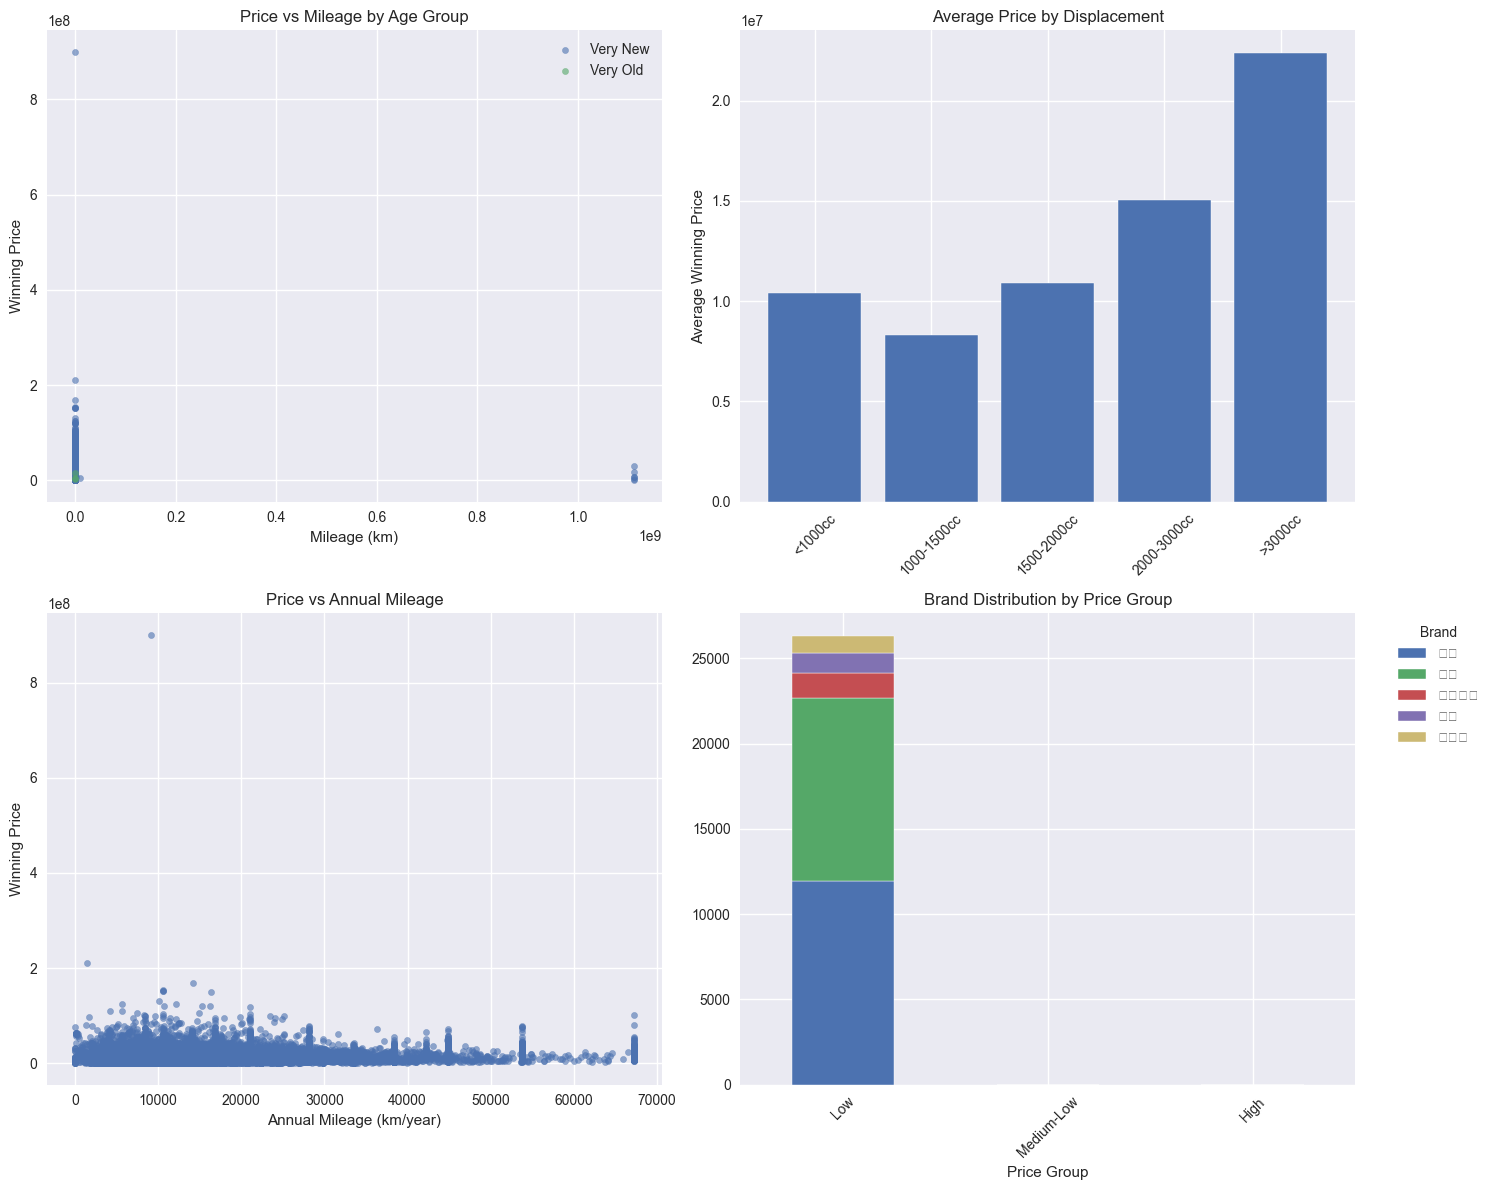


=== 주요 인사이트 ===
평균 낙찰가: 13,485,758원
중간값 낙찰가: 10,100,000원
최고 낙찰가: 900,010,000원
최저 낙찰가: 275,000원

가장 비싼 브랜드 TOP 3:
1. 애스턴마틴: 110,100,000원
2. 페라리: 75,000,000원
3. 제네시스: 34,039,331원

차량 나이와 가격의 상관관계: -0.120
주행거리와 가격의 상관관계: -0.005

분석이 완료되었습니다!


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (matplotlib)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 스타일 설정
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

class CarAuctionEDA:
    def __init__(self, df):
        self.df = df.copy()
        self.prepare_data()
    
    def prepare_data(self):
        """데이터 전처리"""
        # 날짜 컬럼 변환
        if 'auction_date' in self.df.columns:
            self.df['auction_date'] = pd.to_datetime(self.df['auction_date'])
            self.df['auction_year'] = self.df['auction_date'].dt.year
            self.df['auction_month'] = self.df['auction_date'].dt.month
        
        # 차량 나이 계산
        if 'year' in self.df.columns and 'auction_date' in self.df.columns:
            self.df['car_age'] = self.df['auction_year'] - self.df['year']
        
        # 연간 평균 주행거리 계산
        if 'mileage_km' in self.df.columns and 'car_age' in self.df.columns:
            self.df['annual_mileage'] = self.df['mileage_km'] / (self.df['car_age'] + 1)
            self.df['annual_mileage'] = self.df['annual_mileage'].replace([np.inf, -np.inf], np.nan)
    
    def basic_info(self):
        """기본 데이터 정보"""
        print("=== 데이터 기본 정보 ===")
        print(f"데이터 크기: {self.df.shape}")
        print(f"\n컬럼별 결측치:")
        print(self.df.isnull().sum())
        print(f"\n기본 통계:")
        print(self.df.describe())
        
    def plot_target_distribution(self):
        """타겟 변수(winning_price) 분포 분석"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 원본 분포
        axes[0,0].hist(self.df['winning_price'], bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title('Winning Price Distribution')
        axes[0,0].set_xlabel('Winning Price')
        axes[0,0].set_ylabel('Frequency')
        
        # 로그 변환 분포
        log_price = np.log1p(self.df['winning_price'])
        axes[0,1].hist(log_price, bins=50, alpha=0.7, color='lightcoral')
        axes[0,1].set_title('Log-transformed Winning Price Distribution')
        axes[0,1].set_xlabel('Log(Winning Price)')
        axes[0,1].set_ylabel('Frequency')
        
        # 박스플롯
        axes[1,0].boxplot(self.df['winning_price'])
        axes[1,0].set_title('Winning Price Box Plot')
        axes[1,0].set_ylabel('Winning Price')
        
        # QQ plot (정규분포와 비교)
        from scipy import stats
        stats.probplot(log_price.dropna(), dist="norm", plot=axes[1,1])
        axes[1,1].set_title('Q-Q Plot (Log-transformed)')
        
        plt.tight_layout()
        plt.show()
    
    def plot_categorical_analysis(self):
        """범주형 변수들과 가격의 관계"""
        categorical_cols = ['brand', 'transmission', 'fuel', 'color']
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        axes = axes.ravel()
        
        for i, col in enumerate(categorical_cols):
            if col in self.df.columns:
                # 상위 10개 카테고리만 표시
                top_categories = self.df[col].value_counts().head(10).index
                filtered_df = self.df[self.df[col].isin(top_categories)]
                
                sns.boxplot(data=filtered_df, x=col, y='winning_price', ax=axes[i])
                axes[i].set_title(f'Winning Price by {col.title()}')
                axes[i].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def plot_numerical_relationships(self):
        """수치형 변수들과 가격의 관계"""
        numerical_cols = ['year', 'mileage_km', 'displacement_cc', 'car_age']
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.ravel()
        
        for i, col in enumerate(numerical_cols):
            if col in self.df.columns:
                # 이상치 제거를 위한 99% percentile 필터링
                q99 = self.df[col].quantile(0.99)
                filtered_df = self.df[self.df[col] <= q99]
                
                axes[i].scatter(filtered_df[col], filtered_df['winning_price'], 
                              alpha=0.6, s=20)
                axes[i].set_xlabel(col.replace('_', ' ').title())
                axes[i].set_ylabel('Winning Price')
                axes[i].set_title(f'Winning Price vs {col.replace("_", " ").title()}')
                
                # 추세선 추가
                if len(filtered_df) > 1:
                    z = np.polyfit(filtered_df[col], filtered_df['winning_price'], 1)
                    p = np.poly1d(z)
                    axes[i].plot(filtered_df[col], p(filtered_df[col]), "r--", alpha=0.8)
        
        plt.tight_layout()
        plt.show()
    
    def plot_correlation_matrix(self):
        """상관관계 매트릭스"""
        # 수치형 컬럼들만 선택
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        corr_matrix = self.df[numeric_cols].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()
    
    def plot_temporal_analysis(self):
        """시간적 분석"""
        if 'auction_date' not in self.df.columns:
            print("auction_date 컬럼이 없어 시간적 분석을 수행할 수 없습니다.")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 연도별 평균 가격
        yearly_avg = self.df.groupby('auction_year')['winning_price'].mean()
        axes[0,0].plot(yearly_avg.index, yearly_avg.values, marker='o')
        axes[0,0].set_title('Average Winning Price by Year')
        axes[0,0].set_xlabel('Auction Year')
        axes[0,0].set_ylabel('Average Winning Price')
        
        # 월별 평균 가격
        monthly_avg = self.df.groupby('auction_month')['winning_price'].mean()
        axes[0,1].bar(monthly_avg.index, monthly_avg.values)
        axes[0,1].set_title('Average Winning Price by Month')
        axes[0,1].set_xlabel('Month')
        axes[0,1].set_ylabel('Average Winning Price')
        
        # 경매 건수 추이
        auction_counts = self.df.groupby('auction_year').size()
        axes[1,0].bar(auction_counts.index, auction_counts.values, alpha=0.7)
        axes[1,0].set_title('Number of Auctions by Year')
        axes[1,0].set_xlabel('Auction Year')
        axes[1,0].set_ylabel('Number of Auctions')
        
        # 경매회사별 평균 가격
        if 'auction_house' in self.df.columns:
            house_avg = self.df.groupby('auction_house')['winning_price'].mean().sort_values(ascending=False)
            axes[1,1].barh(house_avg.index, house_avg.values)
            axes[1,1].set_title('Average Winning Price by Auction House')
            axes[1,1].set_xlabel('Average Winning Price')
        
        plt.tight_layout()
        plt.show()
    
    def plot_brand_analysis(self):
        """브랜드별 심층 분석"""
        if 'brand' not in self.df.columns:
            return
        
        # 상위 10개 브랜드
        top_brands = self.df['brand'].value_counts().head(10).index
        brand_df = self.df[self.df['brand'].isin(top_brands)]
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 15))
        
        # 브랜드별 가격 분포
        sns.violinplot(data=brand_df, x='brand', y='winning_price', ax=axes[0,0])
        axes[0,0].set_title('Price Distribution by Brand')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        # 브랜드별 경매 건수
        brand_counts = brand_df['brand'].value_counts()
        axes[0,1].bar(brand_counts.index, brand_counts.values)
        axes[0,1].set_title('Number of Auctions by Brand')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # 브랜드별 평균 차량 나이
        if 'car_age' in self.df.columns:
            brand_age = brand_df.groupby('brand')['car_age'].mean().sort_values()
            axes[1,0].barh(brand_age.index, brand_age.values)
            axes[1,0].set_title('Average Car Age by Brand')
        
        # 브랜드별 평균 주행거리
        if 'mileage_km' in self.df.columns:
            brand_mileage = brand_df.groupby('brand')['mileage_km'].mean().sort_values()
            axes[1,1].barh(brand_mileage.index, brand_mileage.values)
            axes[1,1].set_title('Average Mileage by Brand')
        
        plt.tight_layout()
        plt.show()
    
    def plot_advanced_analysis(self):
        """고급 분석"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 주행거리 vs 가격 (연식별)
        if 'car_age' in self.df.columns and 'mileage_km' in self.df.columns:
            # 연식 구간별로 나누어 색상 구분
            self.df['age_group'] = pd.cut(self.df['car_age'], bins=5, labels=['Very New', 'New', 'Medium', 'Old', 'Very Old'])
            
            for age_group in self.df['age_group'].dropna().unique():
                subset = self.df[self.df['age_group'] == age_group]
                axes[0,0].scatter(subset['mileage_km'], subset['winning_price'], 
                                label=age_group, alpha=0.6, s=20)
            
            axes[0,0].set_xlabel('Mileage (km)')
            axes[0,0].set_ylabel('Winning Price')
            axes[0,0].set_title('Price vs Mileage by Age Group')
            axes[0,0].legend()
        
        # 배기량별 가격 분포
        if 'displacement_cc' in self.df.columns:
            # 배기량 구간별 분포
            self.df['displacement_group'] = pd.cut(self.df['displacement_cc'], 
                                                  bins=[0, 1000, 1500, 2000, 3000, float('inf')],
                                                  labels=['<1000cc', '1000-1500cc', '1500-2000cc', '2000-3000cc', '>3000cc'])
            
            displacement_avg = self.df.groupby('displacement_group')['winning_price'].mean()
            axes[0,1].bar(range(len(displacement_avg)), displacement_avg.values)
            axes[0,1].set_xticks(range(len(displacement_avg)))
            axes[0,1].set_xticklabels(displacement_avg.index, rotation=45)
            axes[0,1].set_title('Average Price by Displacement')
            axes[0,1].set_ylabel('Average Winning Price')
        
        # 연간 주행거리 vs 가격
        if 'annual_mileage' in self.df.columns:
            # 이상치 제거
            q99 = self.df['annual_mileage'].quantile(0.99)
            filtered_df = self.df[self.df['annual_mileage'] <= q99]
            
            axes[1,0].scatter(filtered_df['annual_mileage'], filtered_df['winning_price'], alpha=0.6, s=20)
            axes[1,0].set_xlabel('Annual Mileage (km/year)')
            axes[1,0].set_ylabel('Winning Price')
            axes[1,0].set_title('Price vs Annual Mileage')
        
        # 가격대별 브랜드 분포
        if 'brand' in self.df.columns:
            # 가격 구간 설정
            self.df['price_group'] = pd.cut(self.df['winning_price'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
            
            price_brand = pd.crosstab(self.df['price_group'], self.df['brand'])
            # 상위 브랜드만 표시
            top_brands = self.df['brand'].value_counts().head(5).index
            price_brand_top = price_brand[top_brands]
            
            price_brand_top.plot(kind='bar', stacked=True, ax=axes[1,1])
            axes[1,1].set_title('Brand Distribution by Price Group')
            axes[1,1].set_xlabel('Price Group')
            axes[1,1].tick_params(axis='x', rotation=45)
            axes[1,1].legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.show()
    
    def generate_insights(self):
        """주요 인사이트 생성"""
        print("\n=== 주요 인사이트 ===")
        
        # 가격 통계
        print(f"평균 낙찰가: {self.df['winning_price'].mean():,.0f}원")
        print(f"중간값 낙찰가: {self.df['winning_price'].median():,.0f}원")
        print(f"최고 낙찰가: {self.df['winning_price'].max():,.0f}원")
        print(f"최저 낙찰가: {self.df['winning_price'].min():,.0f}원")
        
        # 브랜드별 인사이트
        if 'brand' in self.df.columns:
            brand_avg = self.df.groupby('brand')['winning_price'].mean().sort_values(ascending=False)
            print(f"\n가장 비싼 브랜드 TOP 3:")
            for i, (brand, price) in enumerate(brand_avg.head(3).items(), 1):
                print(f"{i}. {brand}: {price:,.0f}원")
        
        # 연식별 인사이트
        if 'car_age' in self.df.columns:
            age_corr = self.df['car_age'].corr(self.df['winning_price'])
            print(f"\n차량 나이와 가격의 상관관계: {age_corr:.3f}")
        
        # 주행거리별 인사이트
        if 'mileage_km' in self.df.columns:
            mileage_corr = self.df['mileage_km'].corr(self.df['winning_price'])
            print(f"주행거리와 가격의 상관관계: {mileage_corr:.3f}")
    
    def run_full_analysis(self):
        """전체 분석 실행"""
        print("자동차 경매 데이터 EDA 분석을 시작합니다...")
        
        self.basic_info()
        self.plot_target_distribution()
        self.plot_categorical_analysis()
        self.plot_numerical_relationships()
        self.plot_correlation_matrix()
        self.plot_temporal_analysis()
        self.plot_brand_analysis()
        self.plot_advanced_analysis()
        self.generate_insights()
        
        print("\n분석이 완료되었습니다!")

# 사용 예시
# 데이터 로드

# EDA 분석 실행
eda = CarAuctionEDA(df)
eda.run_full_analysis()

# 개별 분석도 가능
# eda.plot_brand_analysis()
# eda.plot_temporal_analysis()

=== 분류 기준별 샘플 수 분석 ===

brand:
  - 전체 카테고리: 36개
  - 충분한 샘플(50개 이상): 18개
  - 평균 샘플 수: 857.1개
  - 최소 샘플 수: 1개

brand_tier:
  - 전체 카테고리: 4개
  - 충분한 샘플(50개 이상): 4개
  - 평균 샘플 수: 7713.8개
  - 최소 샘플 수: 1578개

car_class:
  - 전체 카테고리: 5개
  - 충분한 샘플(50개 이상): 5개
  - 평균 샘플 수: 6171.0개
  - 최소 샘플 수: 2419개

age_group:
  - 전체 카테고리: 4개
  - 충분한 샘플(50개 이상): 4개
  - 평균 샘플 수: 7713.8개
  - 최소 샘플 수: 1465개

=== 최적 세분화 기준 분석 ===
                          combination  total_groups  sufficient_groups  \
1              brand_tier + car_class            19                 19   
0                          brand_tier             4                  4   
2              brand_tier + age_group            16                 15   
6  brand_tier + car_class + age_group            72                 55   
3                               brand            36                 18   
5                   brand + age_group           106                 36   
4                   brand + car_class           125                 38   

   

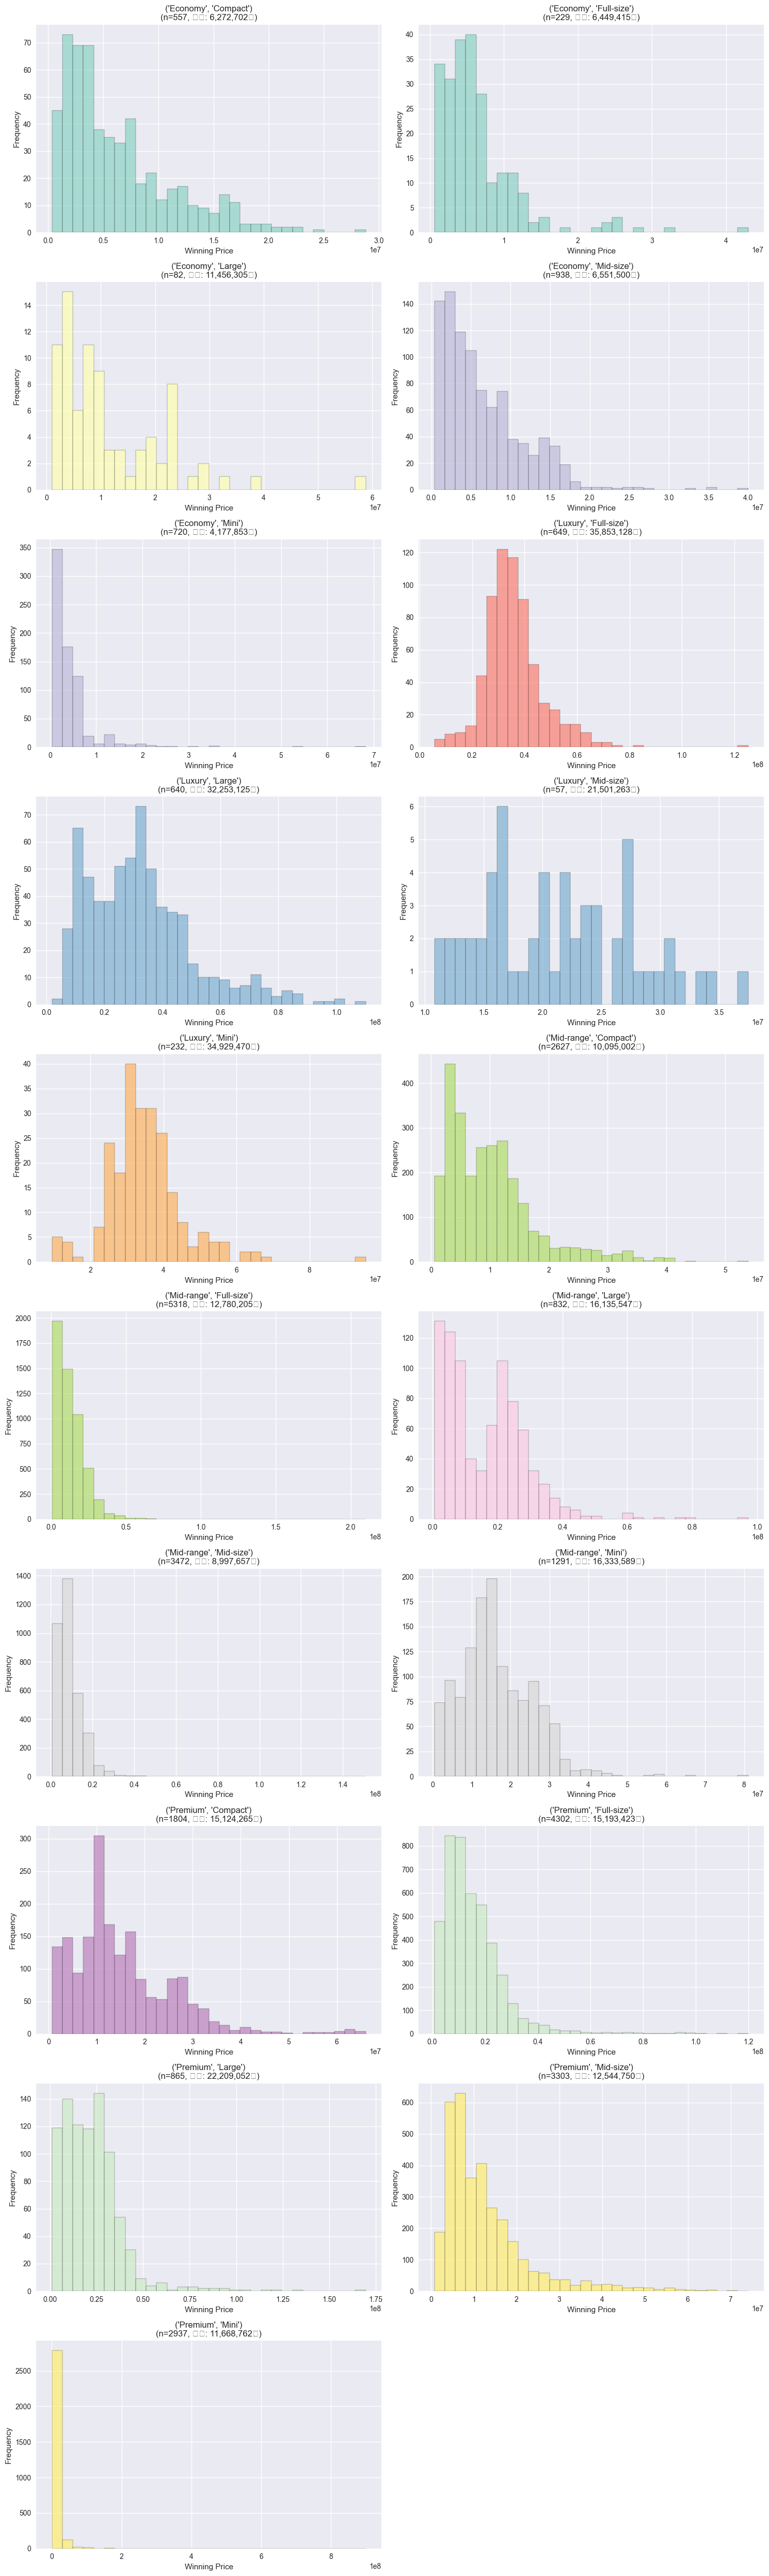


=== 세그먼트 비교 분석 ===
                       Segment  Count   Mean Price  Median Price    Std Price  \
0       ('Economy', 'Compact')    557   6272701.97     4650000.0   4959183.73   
1     ('Economy', 'Full-size')    229   6449414.89     5200000.0   5629921.30   
2         ('Economy', 'Large')     82  11456304.88     8155500.0  10097357.87   
3      ('Economy', 'Mid-size')    938   6551500.47     5100000.0   5226291.82   
4          ('Economy', 'Mini')    720   4177853.02     2799950.0   5164927.50   
5      ('Luxury', 'Full-size')    649  35853127.89    34600000.0  11278710.10   
6          ('Luxury', 'Large')    640  32253125.00    30400000.0  18349198.05   
7       ('Luxury', 'Mid-size')     57  21501263.16    21310000.0   6398342.16   
8           ('Luxury', 'Mini')    232  34929469.83    33450000.0  10581259.61   
9     ('Mid-range', 'Compact')   2627  10095002.16     8950000.0   7497098.62   
10  ('Mid-range', 'Full-size')   5318  12780204.73    10300000.0   9491768.81   
11      

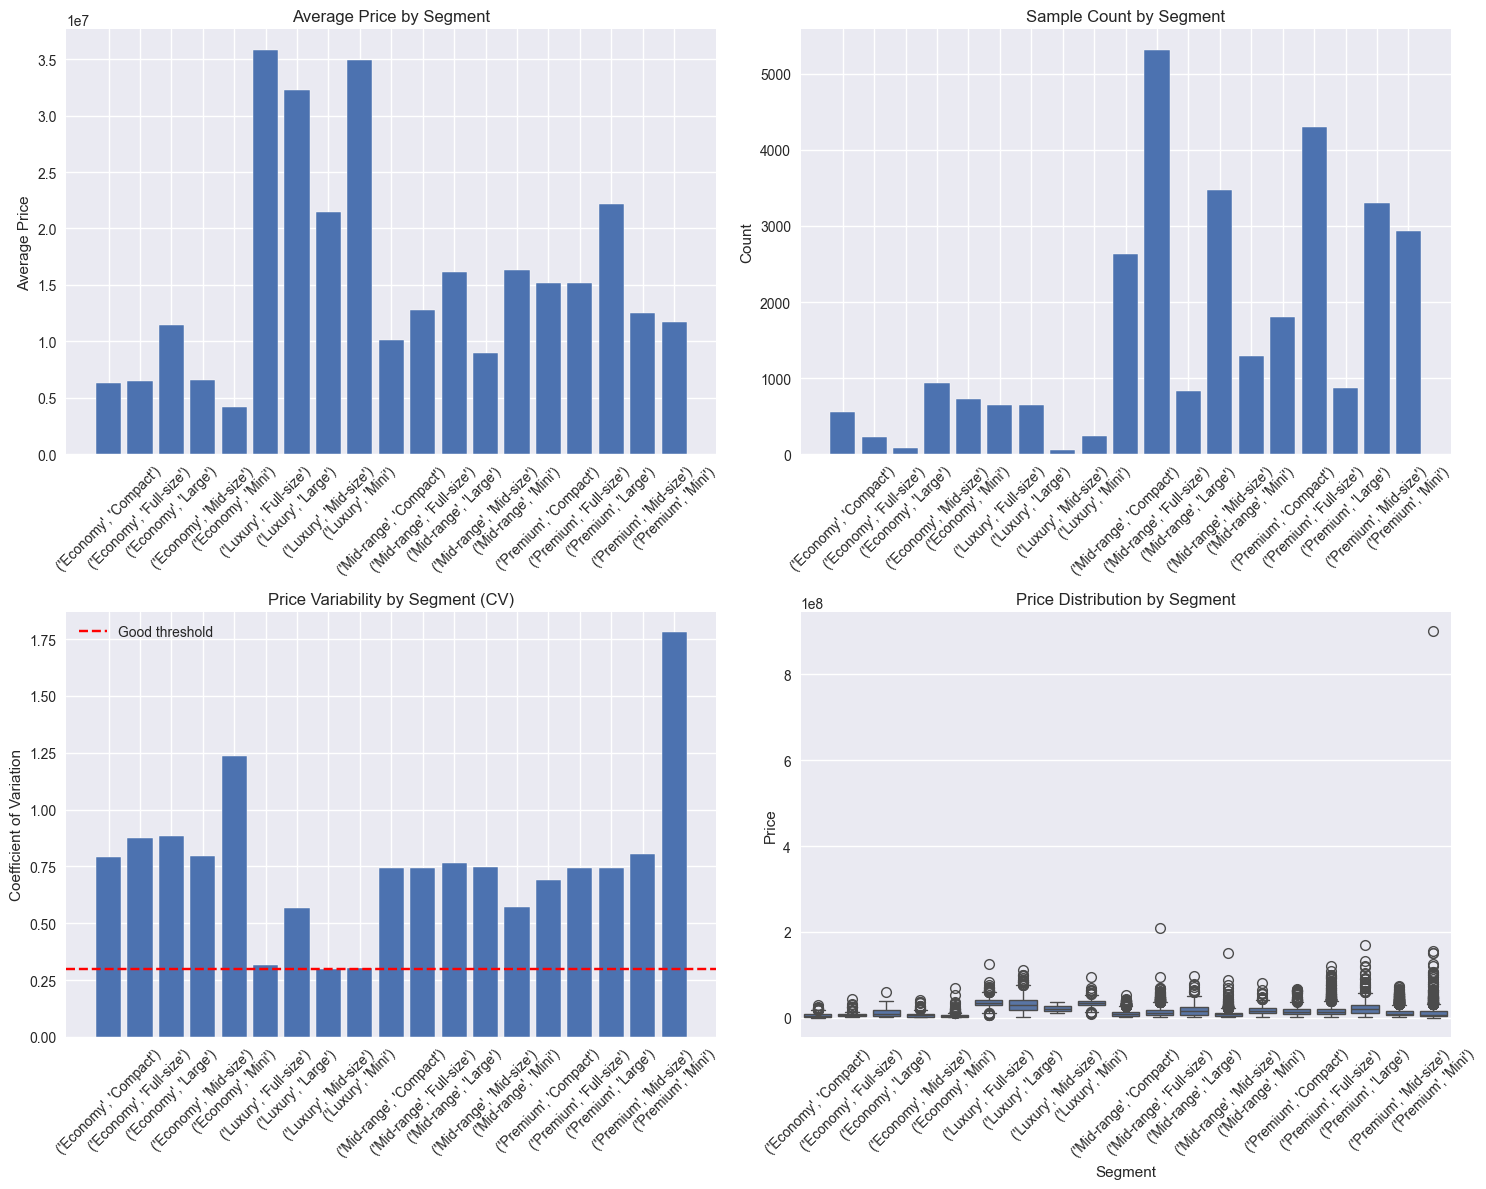


=== 차종별 분석 전략 추천 ===
전체 데이터: 30,855개
브랜드 수: 36개
최소 샘플 기준: 50개

📊 대규모 데이터셋
추천: 브랜드 + 모델 조합으로 세분화된 분석
이유: 충분한 샘플로 세밀한 분석 가능

🎯 핵심 원칙:
1. 세그먼트당 최소 50개 샘플 확보
2. 변동계수(CV) 0.5 이하 유지 (동질성 확보)
3. 비즈니스적 의미가 있는 분류 기준 선택


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

class CarSegmentAnalyzer:
    def __init__(self, df, min_samples=30):
        self.df = df.copy()
        self.min_samples = min_samples  # 최소 샘플 수 기준
        self.segments = {}
        
    def create_car_segments(self):
        """차종 세그먼트 생성"""
        
        # 1. 브랜드별 가격대 구간 생성
        brand_price_median = self.df.groupby('brand')['winning_price'].median()
        
        # 가격대별 브랜드 분류
        luxury_threshold = brand_price_median.quantile(0.8)
        premium_threshold = brand_price_median.quantile(0.6)
        economy_threshold = brand_price_median.quantile(0.4)
        
        def classify_brand_tier(brand):
            median_price = brand_price_median.get(brand, 0)
            if median_price >= luxury_threshold:
                return 'Luxury'
            elif median_price >= premium_threshold:
                return 'Premium'
            elif median_price >= economy_threshold:
                return 'Mid-range'
            else:
                return 'Economy'
        
        self.df['brand_tier'] = self.df['brand'].apply(classify_brand_tier)
        
        # 2. 배기량 기반 차급 분류
        def classify_car_class(displacement):
            if pd.isna(displacement):
                return 'Unknown'
            elif displacement < 1000:
                return 'Mini'
            elif displacement < 1600:
                return 'Compact'
            elif displacement < 2000:
                return 'Mid-size'
            elif displacement < 3000:
                return 'Full-size'
            else:
                return 'Large'
        
        self.df['car_class'] = self.df['displacement_cc'].apply(classify_car_class)
        
        # 3. 연식 구간 분류
        current_year = self.df['year'].max() if 'year' in self.df.columns else 2024
        def classify_age_group(year):
            age = current_year - year
            if age <= 3:
                return 'New'
            elif age <= 7:
                return 'Recent'
            elif age <= 15:
                return 'Mature'
            else:
                return 'Classic'
        
        if 'year' in self.df.columns:
            self.df['age_group'] = self.df['year'].apply(classify_age_group)
    
    def analyze_sample_distribution(self):
        """분류 기준별 샘플 수 분석"""
        print("=== 분류 기준별 샘플 수 분석 ===\n")
        
        # 1. 단일 기준별 샘플 수
        criteria = ['brand', 'brand_tier', 'car_class', 'age_group']
        
        for criterion in criteria:
            if criterion in self.df.columns:
                counts = self.df[criterion].value_counts()
                sufficient_samples = (counts >= self.min_samples).sum()
                print(f"{criterion}:")
                print(f"  - 전체 카테고리: {len(counts)}개")
                print(f"  - 충분한 샘플({self.min_samples}개 이상): {sufficient_samples}개")
                print(f"  - 평균 샘플 수: {counts.mean():.1f}개")
                print(f"  - 최소 샘플 수: {counts.min()}개\n")
    
    def find_optimal_segmentation(self):
        """최적의 세분화 기준 찾기"""
        
        # 다양한 조합 테스트
        combinations = [
            ['brand_tier'],
            ['brand_tier', 'car_class'],
            ['brand_tier', 'age_group'],
            ['brand'],
            ['brand', 'car_class'],
            ['brand', 'age_group'],
            ['brand_tier', 'car_class', 'age_group']
        ]
        
        results = []
        
        for combo in combinations:
            if all(col in self.df.columns for col in combo):
                # 조합별 그룹 생성
                if len(combo) == 1:
                    groups = self.df.groupby(combo[0])
                else:
                    groups = self.df.groupby(combo)
                
                group_sizes = groups.size()
                sufficient_groups = (group_sizes >= self.min_samples).sum()
                total_groups = len(group_sizes)
                avg_group_size = group_sizes.mean()
                
                # 그룹 내 가격 분산 계산 (동질성 측정)
                within_group_cv = []
                for name, group in groups:
                    if len(group) >= 5:  # 최소 5개 샘플이 있는 그룹만
                        cv = group['winning_price'].std() / group['winning_price'].mean()
                        within_group_cv.append(cv)
                
                avg_cv = np.mean(within_group_cv) if within_group_cv else np.inf
                
                results.append({
                    'combination': ' + '.join(combo),
                    'total_groups': total_groups,
                    'sufficient_groups': sufficient_groups,
                    'coverage_rate': sufficient_groups / total_groups,
                    'avg_group_size': avg_group_size,
                    'avg_cv': avg_cv,
                    'score': sufficient_groups * avg_group_size / (1 + avg_cv)  # 종합 점수
                })
        
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values('score', ascending=False)
        
        print("=== 최적 세분화 기준 분석 ===")
        print(results_df.round(3))
        print(f"\n추천 조합: {results_df.iloc[0]['combination']}")
        
        return results_df.iloc[0]['combination']
    
    def create_dynamic_segments(self, base_criteria=['brand_tier', 'car_class']):
        """동적 세그먼트 생성 (샘플 수 기반)"""
        
        segments = {}
        
        # 1차: 기본 기준으로 그룹 생성
        if len(base_criteria) == 1:
            groups = self.df.groupby(base_criteria[0])
        else:
            groups = self.df.groupby(base_criteria)
        
        for name, group in groups:
            if len(group) >= self.min_samples:
                segments[str(name)] = group
            else:
                # 샘플이 부족한 경우, 상위 카테고리로 병합
                if isinstance(name, tuple):
                    # 마지막 기준 제거하여 상위 카테고리로
                    parent_key = name[:-1] if len(name) > 1 else name[0]
                else:
                    parent_key = 'Others'
                
                parent_key = str(parent_key)
                if parent_key not in segments:
                    segments[parent_key] = group
                else:
                    segments[parent_key] = pd.concat([segments[parent_key], group])
        
        # 최종적으로 여전히 샘플이 부족한 세그먼트들을 'Others'로 통합
        final_segments = {}
        others_groups = []
        
        for seg_name, seg_data in segments.items():
            if len(seg_data) >= self.min_samples:
                final_segments[seg_name] = seg_data
            else:
                others_groups.append(seg_data)
        
        if others_groups:
            final_segments['Others'] = pd.concat(others_groups)
        
        self.segments = final_segments
        
        print(f"\n=== 동적 세그먼트 생성 결과 ===")
        for seg_name, seg_data in self.segments.items():
            print(f"{seg_name}: {len(seg_data)}개 샘플")
            print(f"  - 평균 가격: {seg_data['winning_price'].mean():,.0f}원")
            print(f"  - 가격 변동계수: {seg_data['winning_price'].std()/seg_data['winning_price'].mean():.3f}")
    
    def analyze_segments(self):
        """세그먼트별 상세 분석"""
        
        if not self.segments:
            print("먼저 create_dynamic_segments()를 실행해주세요.")
            return
        
        # 세그먼트별 분석 결과
        n_segments = len(self.segments)
        fig, axes = plt.subplots((n_segments + 1) // 2, 2, figsize=(15, 5 * ((n_segments + 1) // 2)))
        
        if n_segments == 1:
            axes = [axes]
        elif (n_segments + 1) // 2 == 1:
            axes = [axes]
        else:
            axes = axes.ravel()
        
        colors = plt.cm.Set3(np.linspace(0, 1, n_segments))
        
        for i, (seg_name, seg_data) in enumerate(self.segments.items()):
            if i < len(axes):
                # 각 세그먼트의 가격 분포
                axes[i].hist(seg_data['winning_price'], bins=30, alpha=0.7, 
                           color=colors[i], edgecolor='black')
                axes[i].set_title(f'{seg_name}\n(n={len(seg_data)}, 평균: {seg_data["winning_price"].mean():,.0f}원)')
                axes[i].set_xlabel('Winning Price')
                axes[i].set_ylabel('Frequency')
        
        # 빈 서브플롯 제거
        for i in range(len(self.segments), len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()
    
    def compare_segments(self):
        """세그먼트 간 비교 분석"""
        
        if not self.segments:
            return
        
        # 세그먼트별 주요 통계
        comparison_data = []
        
        for seg_name, seg_data in self.segments.items():
            stats = {
                'Segment': seg_name,
                'Count': len(seg_data),
                'Mean Price': seg_data['winning_price'].mean(),
                'Median Price': seg_data['winning_price'].median(),
                'Std Price': seg_data['winning_price'].std(),
                'CV': seg_data['winning_price'].std() / seg_data['winning_price'].mean()
            }
            
            if 'mileage_km' in seg_data.columns:
                stats['Avg Mileage'] = seg_data['mileage_km'].mean()
            
            if 'year' in seg_data.columns:
                stats['Avg Year'] = seg_data['year'].mean()
            
            comparison_data.append(stats)
        
        comparison_df = pd.DataFrame(comparison_data)
        print("\n=== 세그먼트 비교 분석 ===")
        print(comparison_df.round(2))
        
        # 시각화
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 평균 가격 비교
        axes[0,0].bar(comparison_df['Segment'], comparison_df['Mean Price'])
        axes[0,0].set_title('Average Price by Segment')
        axes[0,0].tick_params(axis='x', rotation=45)
        axes[0,0].set_ylabel('Average Price')
        
        # 샘플 수 비교
        axes[0,1].bar(comparison_df['Segment'], comparison_df['Count'])
        axes[0,1].set_title('Sample Count by Segment')
        axes[0,1].tick_params(axis='x', rotation=45)
        axes[0,1].set_ylabel('Count')
        
        # 변동계수 비교 (동질성 측정)
        axes[1,0].bar(comparison_df['Segment'], comparison_df['CV'])
        axes[1,0].set_title('Price Variability by Segment (CV)')
        axes[1,0].tick_params(axis='x', rotation=45)
        axes[1,0].set_ylabel('Coefficient of Variation')
        axes[1,0].axhline(y=0.3, color='red', linestyle='--', label='Good threshold')
        axes[1,0].legend()
        
        # 박스플롯으로 전체 비교
        segment_names = []
        segment_prices = []
        
        for seg_name, seg_data in self.segments.items():
            segment_names.extend([seg_name] * len(seg_data))
            segment_prices.extend(seg_data['winning_price'].tolist())
        
        segment_df = pd.DataFrame({
            'Segment': segment_names,
            'Price': segment_prices
        })
        
        sns.boxplot(data=segment_df, x='Segment', y='Price', ax=axes[1,1])
        axes[1,1].set_title('Price Distribution by Segment')
        axes[1,1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        return comparison_df
    
    def recommend_analysis_strategy(self):
        """분석 전략 추천"""
        
        total_samples = len(self.df)
        unique_brands = self.df['brand'].nunique() if 'brand' in self.df.columns else 0
        
        print("\n=== 차종별 분석 전략 추천 ===")
        print(f"전체 데이터: {total_samples:,}개")
        print(f"브랜드 수: {unique_brands}개")
        print(f"최소 샘플 기준: {self.min_samples}개\n")
        
        if total_samples < 1000:
            print("📊 소규모 데이터셋")
            print("추천: 브랜드 티어 + 차급 조합으로 4-6개 세그먼트 생성")
            print("이유: 세분화보다는 충분한 샘플 확보가 우선")
            
        elif total_samples < 10000:
            print("📊 중규모 데이터셋") 
            print("추천: 브랜드별 분석 + 샘플 부족 브랜드는 티어별 통합")
            print("이유: 브랜드별 특성 파악 가능하면서도 안정적인 분석")
            
        else:
            print("📊 대규모 데이터셋")
            print("추천: 브랜드 + 모델 조합으로 세분화된 분석")
            print("이유: 충분한 샘플로 세밀한 분석 가능")
        
        print(f"\n🎯 핵심 원칙:")
        print(f"1. 세그먼트당 최소 {self.min_samples}개 샘플 확보")
        print(f"2. 변동계수(CV) 0.5 이하 유지 (동질성 확보)")
        print(f"3. 비즈니스적 의미가 있는 분류 기준 선택")

# 사용 예시

# 분석기 초기화
analyzer = CarSegmentAnalyzer(df, min_samples=50)  # 최소 50개 샘플

# 세그먼트 생성
analyzer.create_car_segments()

# 샘플 분포 분석
analyzer.analyze_sample_distribution()

# 최적 세분화 기준 찾기
optimal_criteria = analyzer.find_optimal_segmentation()

# 동적 세그먼트 생성
analyzer.create_dynamic_segments(['brand_tier', 'car_class'])

# 세그먼트별 분석
analyzer.analyze_segments()
comparison_result = analyzer.compare_segments()

# 분석 전략 추천
analyzer.recommend_analysis_strategy()
